In [8]:
import json
import csv
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import poisson

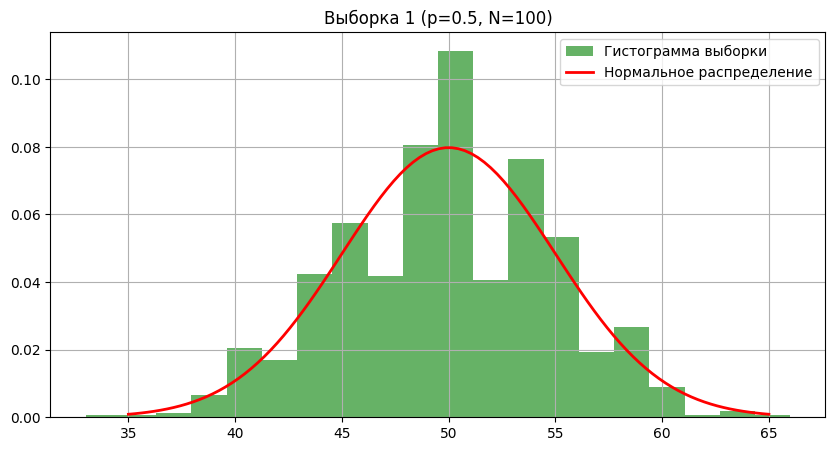

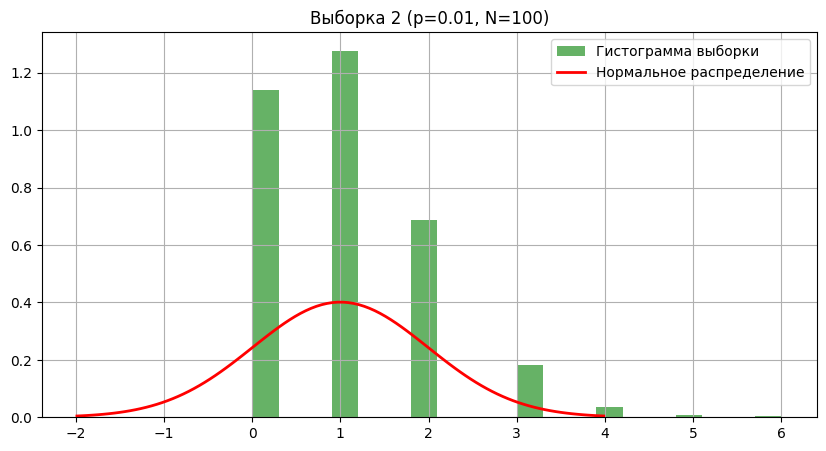

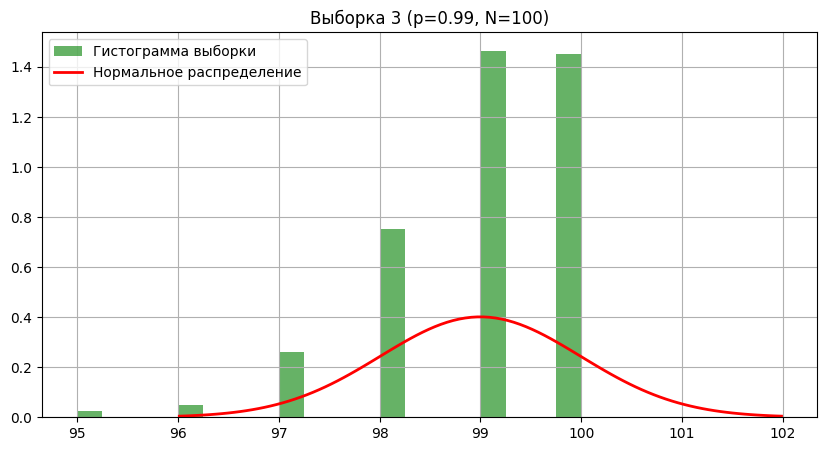

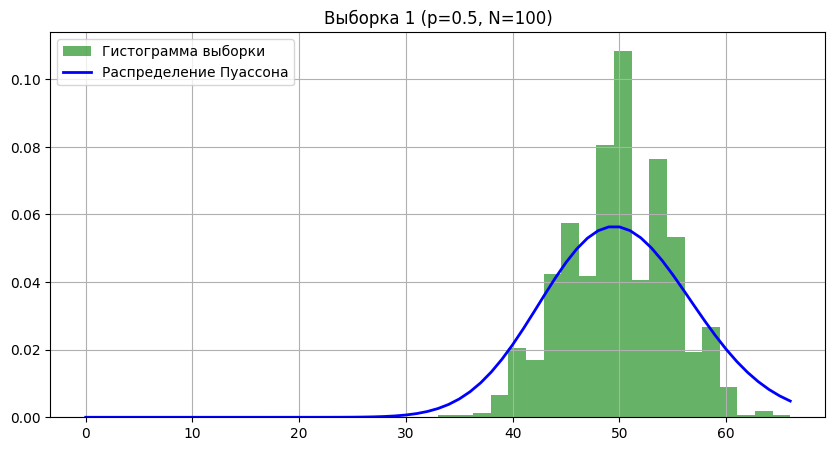

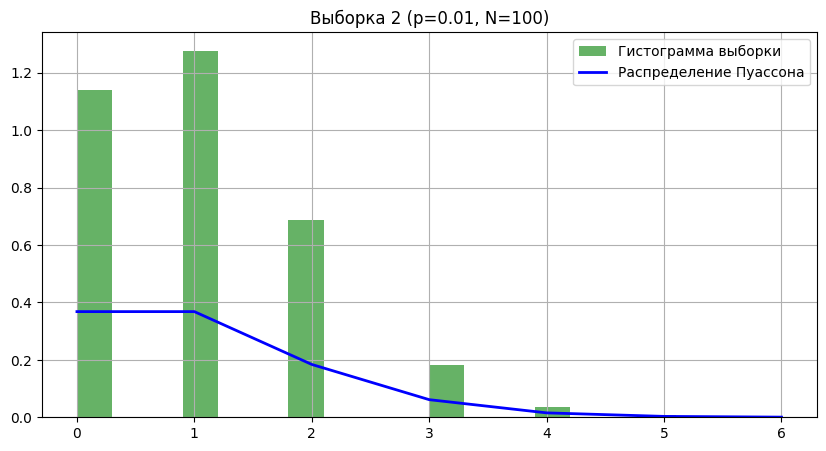

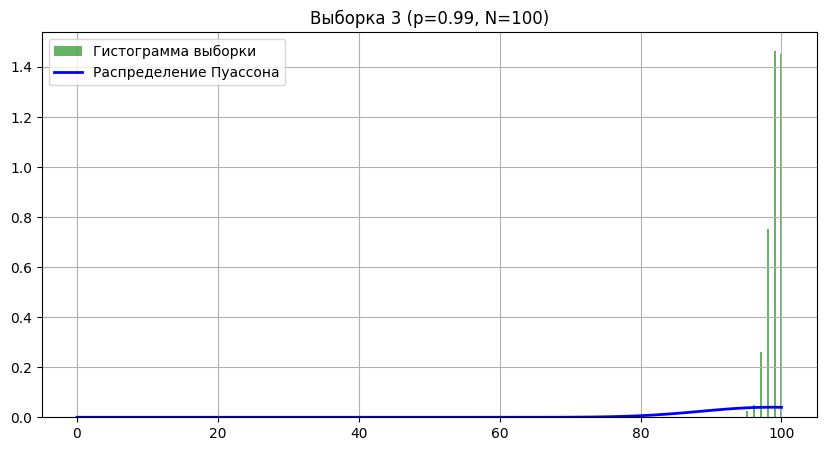

In [13]:
import numpy as np

# Задаем параметры для каждой выборки
params = [(0.5, 100), (0.01, 100), (0.99, 100)]
sample_size = 1000

# Создаем пустые списки для хранения выборок
samples = []

# Генерируем выборки
for p, N in params:
    sample = np.random.binomial(N, p, sample_size)
    samples.append(sample)

for i, (p, N) in enumerate(params):
    plt.figure(figsize=(10, 5))
    plt.hist(samples[i], bins=20, density=True, alpha=0.6, color='g', label='Гистограмма выборки')

    # Вычисляем параметры нормального распределения
    mu = N * p
    sigma = np.sqrt(N * p * (1 - p))
    
    # Создаем массив значений для нормального распределения
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r', lw=2, label='Нормальное распределение')
    
    plt.title(f'Выборка {i + 1} (p={p}, N={N})')
    plt.legend()
    plt.grid(True)
    plt.show()
for i, (p, N) in enumerate(params):
    plt.figure(figsize=(10, 5))
    plt.hist(samples[i], bins=20, density=True, alpha=0.6, color='g', label='Гистограмма выборки')
    
    # Налагаем распределение Пуассона
    x_poisson = np.arange(0, max(samples[i]) + 1)
    plt.plot(x_poisson, poisson.pmf(x_poisson, p*N), 'b', lw=2, label='Распределение Пуассона')
    
    plt.title(f'Выборка {i + 1} (p={p}, N={N})')
    plt.legend()
    plt.grid(True)
    plt.show()

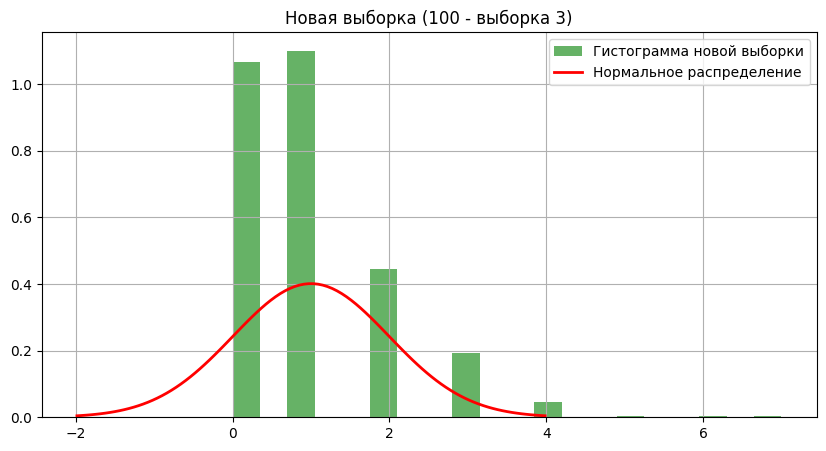

In [10]:
# Создаем новую выборку
new_sample = 100 - samples[2]

# Строим гистограмму
plt.figure(figsize=(10, 5))
plt.hist(new_sample, bins=20, density=True, alpha=0.6, color='g', label='Гистограмма новой выборки')

# Вычисляем параметры нормального распределения для новой выборки
mu = 100 - params[2][0] * params[2][1]
sigma = np.sqrt(params[2][0] * params[2][1] * (1 - params[2][0]))

# Создаем массив значений для нормального распределения
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', lw=2, label='Нормальное распределение')

plt.title(f'Новая выборка (100 - выборка 3)')
plt.legend()
plt.grid(True)
plt.show()


A)Гистограмма для первой выборки (p=0.5) "похожа" на нормальное распределение. Это можно ожидать из-за центральной предельной теоремы, которая утверждает, что сумма большого количества независимых и одинаково распределенных случайных величин приближается к нормальному распределению.

Б)Распределение Пуассона действительно лучше подходит для дискретных данных с низкой вероятностью успеха (маленький p), но в данном случае, когда p=0.01 и N=100, оно все равно может отличаться от распределения Пуассона.

Чтобы улучшить подход к аппроксимации данной выборки, вы можете увеличить количество испытаний N, что сделает распределение ближе к распределению Пуассона. Вот пример с увеличенным значением N:

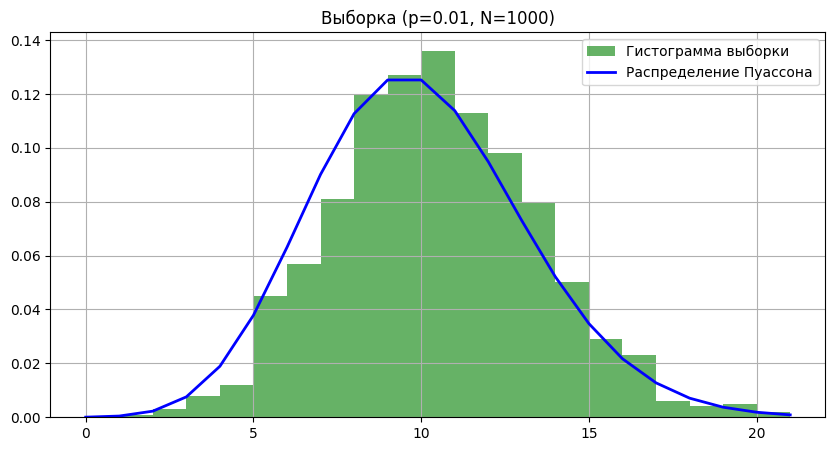

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Задаем параметры для второй выборки с увеличенным N
p = 0.01
N = 1000
sample_size = 1000

# Генерируем выборку
sample = np.random.binomial(N, p, sample_size)

# Строим гистограмму с наложенным распределением Пуассона
plt.figure(figsize=(10, 5))
plt.hist(sample, bins=20, density=True, alpha=0.6, color='g', label='Гистограмма выборки')

# Налагаем распределение Пуассона
x_poisson = np.arange(0, max(sample) + 1)
plt.plot(x_poisson, poisson.pmf(x_poisson, p * N), 'b', lw=2, label='Распределение Пуассона')

plt.title(f'Выборка (p={p}, N={N})')
plt.legend()
plt.grid(True)
plt.show()


В) Нормальная аппроксимация дает плохой результат для третьей выборки (p=0.99) потому, что это уже очень скошенное биномиальное распределение, где большинство значений сосредоточены около одного из концов (0 или N), и дисперсия слишком мала для нормального распределения.



Распределение Бернулли - это дискретное вероятностное распределение, которое моделирует случайный эксперимент с двумя возможными исходами: "успех" и "неудача", где вероятность "успеха" обозначается как p, а вероятность "неудачи" как q = 1 - p. Содержательный смысл распределения Бернулли часто связан с моделированием бинарных событий или случайных экспериментов, где результат может быть либо положительным (успех), либо отрицательным (неудачей).


Нормальное распределение (или распределение Гаусса) встречается в приложениях чаще других распределений по нескольким ключевым причинам:

Центральная предельная теорема: Нормальное распределение является основой для центральной предельной теоремы (ЦПТ). Эта теорема утверждает, что сумма большого числа независимых и одинаково распределенных случайных величин (независимо от их изначального распределения) имеет распределение, близкое к нормальному. Это свойство делает нормальное распределение особенно полезным для моделирования и анализа данных, так как множество процессов и явлений в природе и обществе можно рассматривать как сумму множества случайных факторов.

Устойчивость к шумам и ошибкам: Нормальное распределение хорошо описывает многие естественные процессы и случайные вариации. Из-за этой устойчивости к шумам и случайным факторам оно широко используется в статистике и анализе данных для моделирования случайных ошибок и шумов в данных.

Простота и удобство: Нормальное распределение обладает простой и аналитически выразимой функцией плотности вероятности. Это позволяет проводить анализ и вычисления относительно легко. Стандартное нормальное распределение (с математическим ожиданием равным 0 и стандартным отклонением равным 1) особенно удобно, так как позволяет использовать таблицы стандартных нормальных значений.

Применение в статистических тестах: Множество статистических тестов и методов, используемых для анализа данных, предполагают или требуют предположения о нормальном распределении данных. Это делает нормальное распределение стандартным выбором для моделирования данных в статистическом анализе.

Аппроксимация других распределений: Нормальное распределение может хорошо аппроксимировать другие распределения, особенно если размер выборки достаточно большой. Это облегчает анализ данных, даже если они исходно не имеют нормальное распределение.

При увеличении объема выборки в распределении Бернулли частота появления единицы (успеха) стремится к вероятности успеха в одном испытании этого распределения. Это утверждение обосновывается в законе больших чисел (ЗБЧ), который включает в себя несколько вариантов, в том числе закон больших чисел для больших выборок и закон больших чисел для независимых и одинаково распределенных (н.о.р.) случайных величин.

Закон больших чисел для больших выборок (ЗБЧ в слабой форме): Этот закон утверждает, что среднее арифметическое (частота) выборки из любого распределения, даже если оно не является нормальным или не имеет фиксированного математического ожидания или дисперсии, будет сходиться к математическому ожиданию этого распределения при увеличении размера выборки. В случае распределения Бернулли это означает, что среднее значение (частота успехов) выборки будет сходиться к вероятности успеха в одном испытании (p) по мере увеличения размера выборки.

Закон больших чисел для н.о.р. случайных величин (ЗБЧ в сильной форме): Этот закон предполагает, что если у нас есть последовательность независимых и одинаково распределенных случайных величин (например, выборок из распределения Бернулли), то среднее значение этой последовательности (усреднение по всем выборкам) будет сходиться к математическому ожиданию распределения. В случае распределения Бернулли это означает, что среднее значение (частота успехов) всех выборок будет сходиться к вероятности успеха в одном испытании (p).


Параметры биномиального распределения имеют следующий содержательный смысл:

n (trial): Этот параметр представляет собой количество независимых испытаний или попыток в серии. В контексте биномиального распределения, это может быть, например, количество бросков монеты, количество клиентов, посещающих веб-сайт, количество испытаний в медицинском тесте и т.д. Он определяет, сколько раз повторяется случайный процесс с двумя возможными результатами (успехом или неудачей).

p (probability of success): Этот параметр представляет вероятность "успеха" (или положительного исхода) в каждом отдельном испытании или попытке. В контексте биномиального распределения, это вероятность того, что конкретное испытание будет успешным (например, вероятность выпадения орла при броске монеты, вероятность клика на рекламу на веб-сайте и т.д.).

Параметры a и b в распределении N(a,b) обозначают среднее (математическое ожидание) и дисперсию (стандартное отклонение) соответственно для нормального (гауссова) распределения. Эти параметры определяют форму и характеристики этого распределения:

a (математическое ожидание): 
Параметр a представляет собой среднее значение (ожидаемое значение) распределения. Это означает, что в распределении 
N(a,b) среднее значение случайной величины (случайного события) будет равно a. Этот параметр указывает, в какой точке ось значений имеет наибольшую вероятность плотности вероятности распределения, и он также является центром симметрии нормальной кривой.

b (стандартное отклонение): Параметр 
b представляет собой стандартное отклонение распределения. Он измеряет, насколько значения случайной величины (или случайного события) разбросаны относительно её среднего значения. Чем больше значение b, тем больше разброс значений, и наоборот, чем меньше b, тем ближе значения к среднему.



Изменение математического ожидания (a):

При увеличении a график плотности сдвигается вправо, в направлении увеличения значений на оси.

При уменьшении a график плотности сдвигается влево, в направлении уменьшения значений на оси.

Математическое ожидание (a) определяет позицию пика (максимального значения) на графике нормального распределения.

Изменение дисперсии (b):

При увеличении b график плотности становится более широким и плоским, с более размытым пиком.

При уменьшении b график плотности становится более узким и высоким, с более острым пиком.

Дисперсия (b) определяет разброс значений вокруг математического ожидания и форму графика плотности: чем больше дисперсия, тем больше разброс, и наоборот.

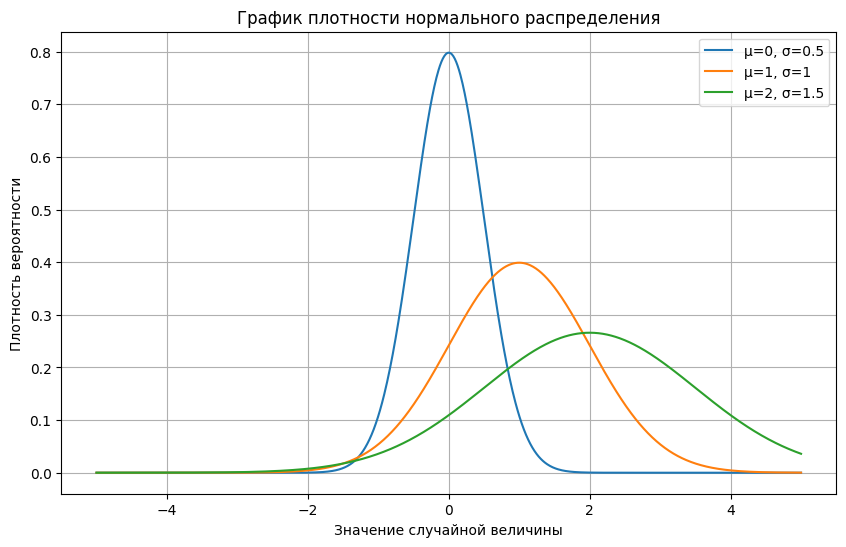

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Задайте параметры распределения
mu_values = [0, 1, 2]  # Разные значения математического ожидания (a)
sigma_values = [0.5, 1, 1.5]  # Разные значения стандартного отклонения (квадратный корень из дисперсии, b)

# Создайте массив значений x для построения графика
x = np.linspace(-5, 5, 1000)

# Постройте графики плотности вероятности для разных параметров
plt.figure(figsize=(10, 6))
for mu, sigma in zip(mu_values, sigma_values):
    pdf = norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, pdf, label=f"μ={mu}, σ={sigma}")

# Добавьте легенду и подписи
plt.title("График плотности нормального распределения")
plt.xlabel("Значение случайной величины")
plt.ylabel("Плотность вероятности")
plt.legend()

# Отобразите график
plt.grid(True)
plt.show()


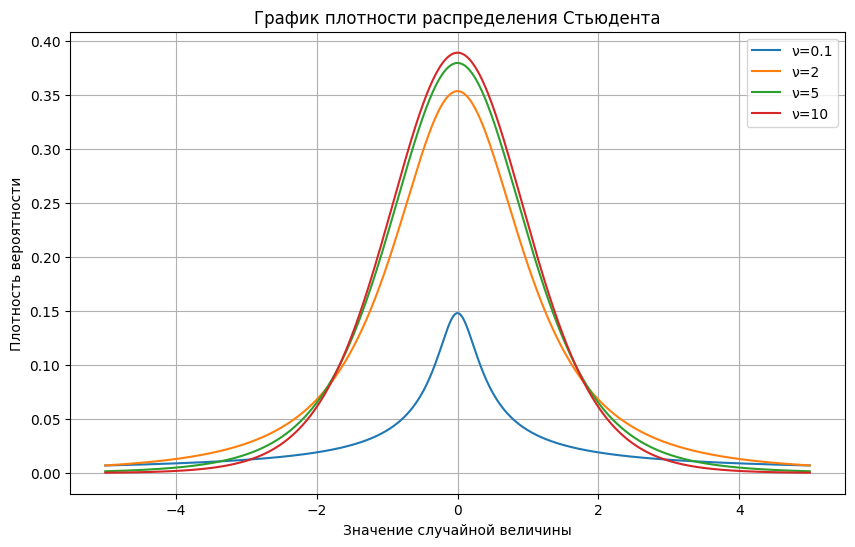

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Задайте разные значения числа степеней свободы (nu)
nu_values = [0.1, 2, 5, 10]

# Создайте массив значений x для построения графика
x = np.linspace(-5, 5, 1000)

# Постройте графики плотности вероятности для разных чисел степеней свободы
plt.figure(figsize=(10, 6))
for nu in nu_values:
    pdf = t.pdf(x, df=nu)
    plt.plot(x, pdf, label=f"ν={nu}")

# Добавьте легенду и подписи
plt.title("График плотности распределения Стьюдента")
plt.xlabel("Значение случайной величины")
plt.ylabel("Плотность вероятности")
plt.legend()

# Отобразите график
plt.grid(True)
plt.show()



График плотности распределения Стьюдента (также известного как распределение t-Стьюдента) изменяется при увеличении числа степеней свободы (часто обозначается как ν). Основные изменения в графике при увеличении числа степеней свободы следующие:

Сходство с нормальным распределением: При увеличении числа степеней свободы распределение Стьюдента становится все более похожим на нормальное распределение. Это происходит из-за центральной предельной теоремы, которая утверждает, что при достаточно больших числах степеней свободы распределение Стьюдента приближается к нормальному распределению.

Более острые пики и тяжелые хвосты: При малых значениях числа степеней свободы распределение Стьюдента имеет более высокие и острые пики и более тяжелые "хвосты" (больший хвостик на краю графика). По мере увеличения числа степеней свободы, хвосты становятся менее тяжелыми, и график становится более похожим на колоколообразный график нормального распределения.

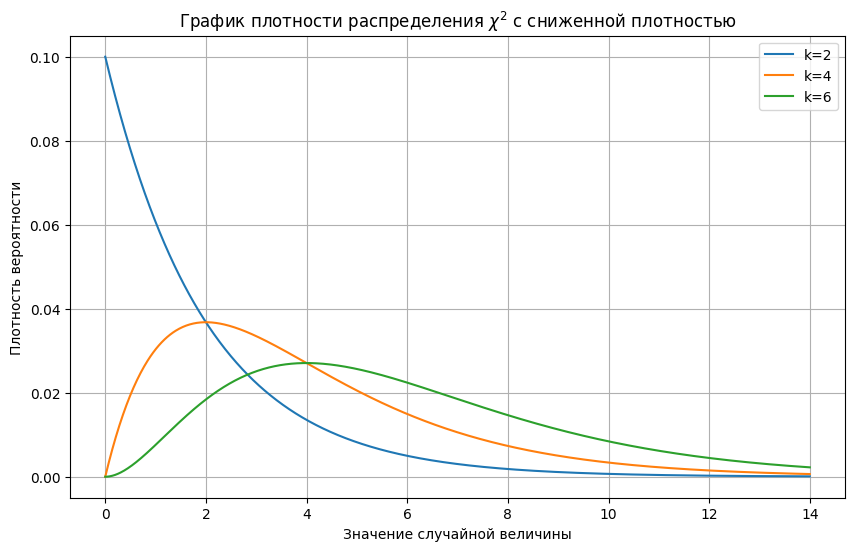

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Задайте разные значения числа степеней свободы (k)
k_values = [2, 4, 6]

# Создайте массив значений x для построения графика
x = np.linspace(0, 14, 1000)

# Постройте графики плотности вероятности для разных чисел степеней свободы с сниженной плотностью
plt.figure(figsize=(10, 6))
for k in k_values:
    pdf = chi2.pdf(x, df=k) * 0.2  # Умножьте на коэффициент для снижения плотности
    plt.plot(x, pdf, label=f"k={k}")

# Добавьте легенду и подписи
plt.title("График плотности распределения $\chi^2$ с сниженной плотностью")
plt.xlabel("Значение случайной величины")
plt.ylabel("Плотность вероятности")
plt.legend()

# Отобразите график
plt.grid(True)
plt.show()


С увеличением числа степеней свободы:

График плотности распределения 
 $\chi^2$становится более симметричным и колоколообразным.
Пик плотности вероятности двигается вправо.
Хвосты распределения становятся менее тяжелыми и более близкими к оси x.